# Importing packages and libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/t20I_cricket_dataset_new.csv')
df.head()

,Unnamed: 0,powerPlay,AverageScore,battingTeam,bowlingTeam,city,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,innings
0,10400,0.0,138.162791,New Zealand,Pakistan,Dubai,63,56,5.894737,8,24.0,2.0,144,1.0
1,163545,0.0,103.000000,Zimbabwe,Sri Lanka,Hambantota,40,76,5.700000,5,30.0,2.0,100,2.0
2,1557,0.0,154.000000,West Indies,Australia,St Lucia,53,68,6.089552,5,27.0,3.0,105,1.0
3,94589,0.0,146.285714,Australia,India,Bengaluru,18,159,9.352941,7,50.0,0.0,194,2.0
4,119086,0.0,135.609756,Sri Lanka,South Africa,Colombo,42,82,6.307692,7,38.0,1.0,135,2.0


# Analyzing dataset

In [ ]:
df.tail()

,Unnamed: 0,powerPlay,AverageScore,battingTeam,bowlingTeam,city,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,innings
39995,133938,0.0,146.153846,England,New Zealand,Durban,45,88,7.040000,7,27.0,3.0,159,2.0
39996,55447,0.0,148.206897,Pakistan,Bangladesh,Mirpur,5,135,7.043478,6,40.0,1.0,141,1.0
39997,92281,0.0,119.200000,New Zealand,West Indies,Lauderhill,24,117,7.312500,3,33.0,3.0,153,2.0
39998,146030,0.0,130.800000,Bangladesh,Sri Lanka,Chattogram,67,67,7.584906,8,NaN,NaN,166,2.0
39999,105886,0.0,149.275862,Bangladesh,South Africa,Johannesburg,78,69,9.857143,7,50.0,3.0,109,2.0


In [ ]:
df.shape

(40000, 14)

In [ ]:
df.describe()

,Unnamed: 0,powerPlay,AverageScore,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,innings
count,40000.000000,39560.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,35824.000000,32024.000000,40000.000000,38698.000000
mean,87048.914900,0.095576,149.247188,47.588725,91.262300,7.536559,6.644975,37.759854,1.487384,152.537275,1.469352
std,50609.815781,0.294013,17.789853,26.082556,39.958323,1.764056,2.110934,11.313722,1.145981,32.789835,0.499066
min,31.000000,0.000000,57.666667,0.000000,6.000000,1.090909,0.000000,5.000000,0.000000,36.000000,1.000000
25%,42948.250000,0.000000,138.071429,26.000000,59.000000,6.324324,5.000000,30.000000,1.000000,132.000000,1.000000
50%,86745.000000,0.000000,149.000000,48.000000,87.000000,7.436620,7.000000,37.000000,1.000000,151.000000,1.000000
75%,130836.500000,0.000000,160.250000,70.000000,119.000000,8.611765,8.000000,45.000000,2.000000,173.000000,2.000000
max,175280.000000,1.000000,219.000000,98.000000,273.000000,16.451613,10.000000,88.000000,8.000000,278.000000,2.000000


describe is used for analyzing statistics for numerical columns in a DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        40000 non-null  int64  
 1   powerPlay         39560 non-null  float64
 2   AverageScore      40000 non-null  float64
 3   battingTeam       40000 non-null  object 
 4   bowlingTeam       40000 non-null  object 
 5   city              40000 non-null  object 
 6   delivery_left     40000 non-null  int64  
 7   score             40000 non-null  int64  
 8   CurrentRunRate    40000 non-null  float64
 9   wicketsLeft       40000 non-null  int64  
 10  Run_In_Last5      35824 non-null  float64
 11  Wickets_In_Last5  32024 non-null  float64
 12  Final_Score       40000 non-null  int64  
 13  innings           38698 non-null  float64
dtypes: float64(6), int64(5), object(3)
memory usage: 4.3+ MB


here info provides a summary of a DataFrame, like
Number of rows, Column names and their data types, Non-null values in each column and
Memory usage

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
powerPlay,float64
AverageScore,float64
battingTeam,object
bowlingTeam,object
city,object
delivery_left,int64
score,int64
CurrentRunRate,float64
wicketsLeft,int64


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
powerPlay,440
AverageScore,0
battingTeam,0
bowlingTeam,0
city,0
delivery_left,0
score,0
CurrentRunRate,0
wicketsLeft,0


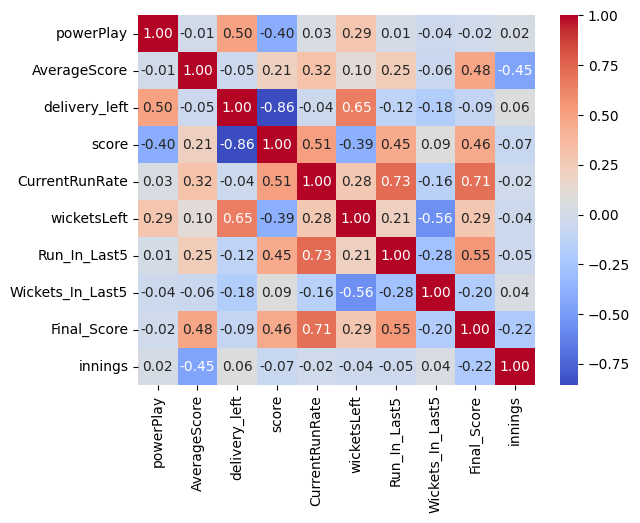

In [ ]:
# plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

#object columns representation

In [ ]:
obj=[i for i in df.columns if df[i].dtype==object]
obj

['battingTeam', 'bowlingTeam', 'city']

<Axes: xlabel='battingTeam', ylabel='count'>

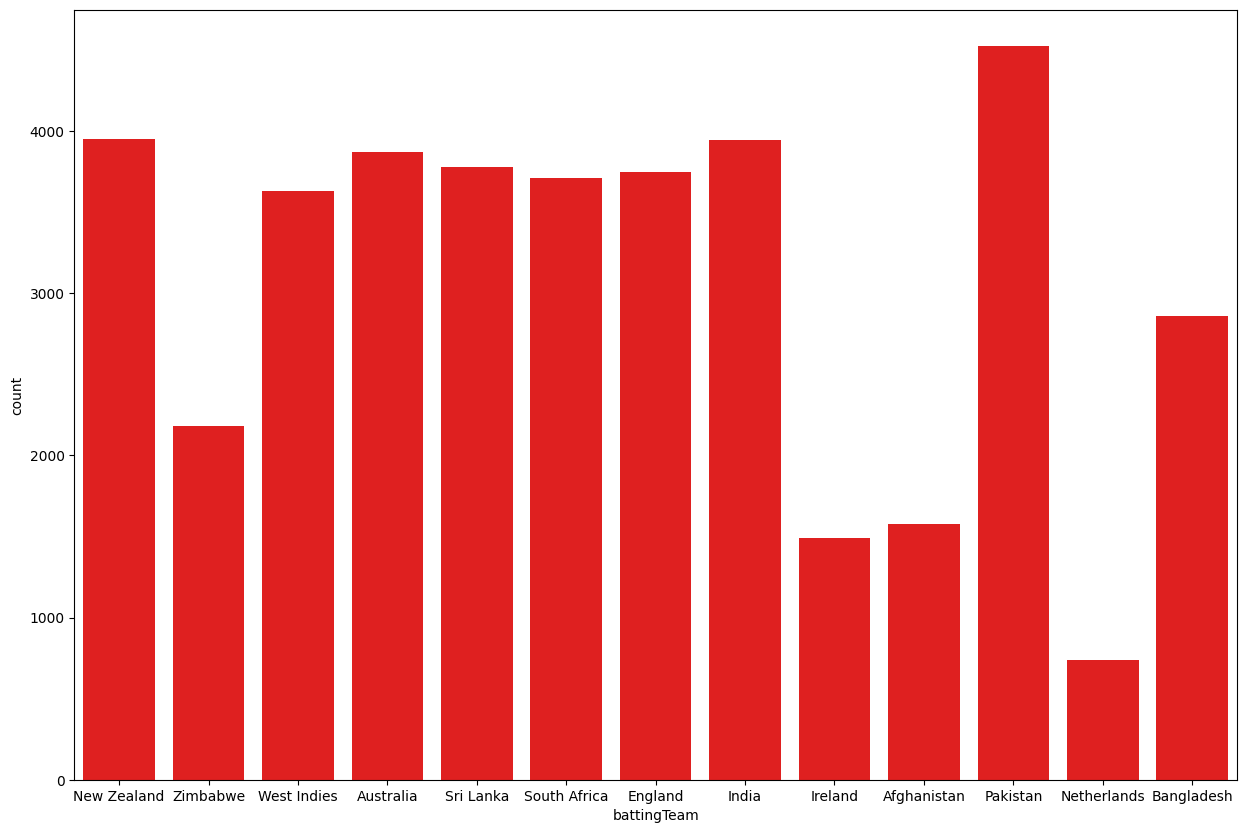

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['battingTeam'],data=df,color='r')


<Axes: xlabel='bowlingTeam', ylabel='count'>

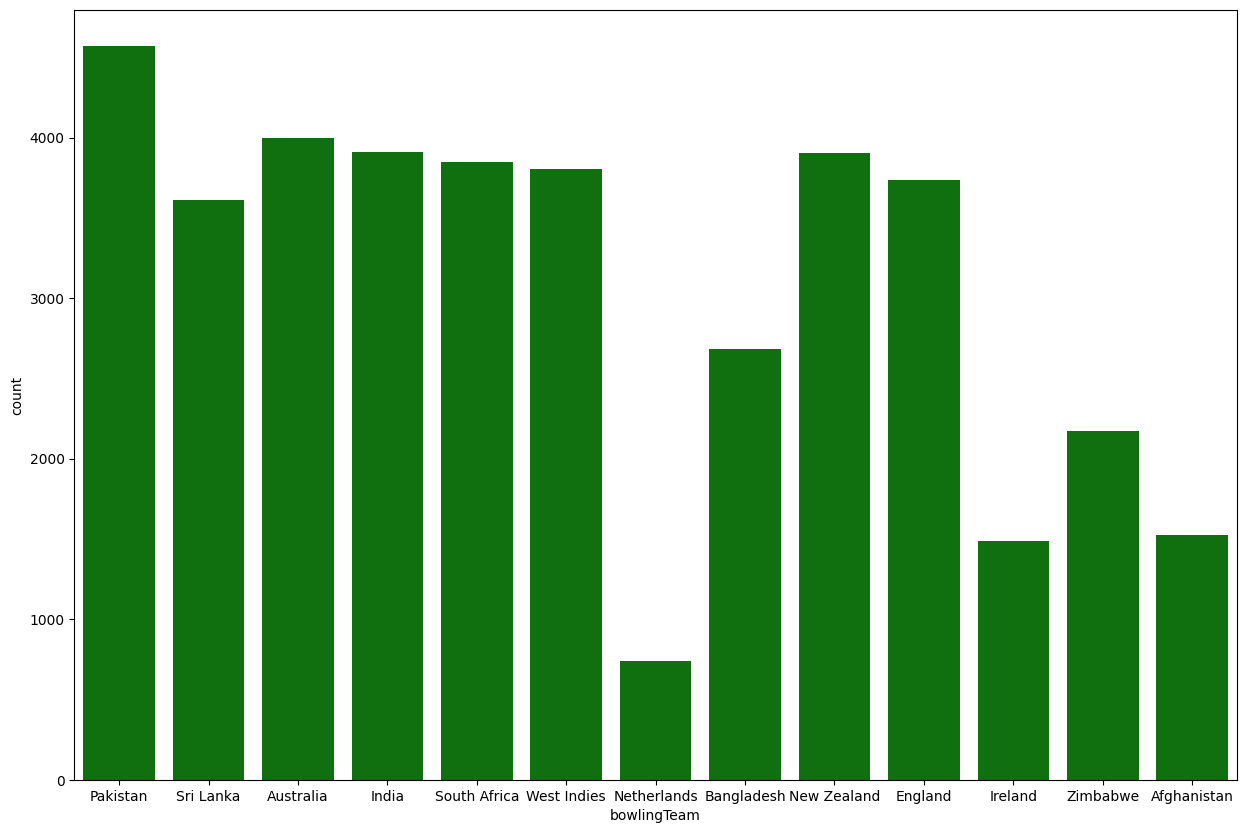

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['bowlingTeam'],data=df,color='g')

In [ ]:
df['city'].value_counts()

,count
city,
Dubai,2270
Colombo,2221
Mirpur,1537
Harare,1537
Johannesburg,1519
...,...
Kanpur,51
Derry,46
Guwahati,44


In [ ]:
city_objs = list(df['city'].unique())
city_objs

['Dubai',
 'Hambantota',
 'St Lucia',
 'Bengaluru',
 'Colombo',
 'London',
 'Lauderhill',
 'Dublin',
 'Edinburgh',
 'Pallekele',
 'Jamaica',
 'Cardiff',
 'Sydney',
 'Christchurch',
 'Lahore',
 'Mirpur',
 'Delhi',
 'Bristol',
 'Al Amarat',
 'Harare',
 'Nelson',
 'Thiruvananthapuram',
 'Ahmedabad',
 'Belfast',
 'Cuttack',
 'Birmingham',
 'Durban',
 'Sharjah',
 'Cape Town',
 'Hobart',
 'Johannesburg',
 'Nagpur',
 'Auckland',
 'Southampton',
 'St Kitts',
 'Centurion',
 'Abu Dhabi',
 'Hamilton',
 'Barbados',
 'The Hague',
 'Chattogram',
 'Sylhet',
 'Brisbane',
 'Adelaide',
 'Lucknow',
 'Melbourne',
 'Wellington',
 'Manchester',
 'Dhaka',
 'Pune',
 'Bulawayo',
 'Kolkata',
 'Bready',
 'Rajkot',
 'Chandigarh',
 'Antigua',
 'Chennai',
 'Nottingham',
 'Mumbai',
 'Gros Islet',
 'Indore',
 'Trinidad',
 'Port Elizabeth',
 'Paarl',
 'Dharamsala',
 'Kandy',
 'Chester-le-Street',
 "St George's",
 'Rawalpindi',
 'Dehradun',
 'Napier',
 'St Vincent',
 'Perth',
 'Nairobi',
 'Khulna',
 'Dominica',
 'Bridg

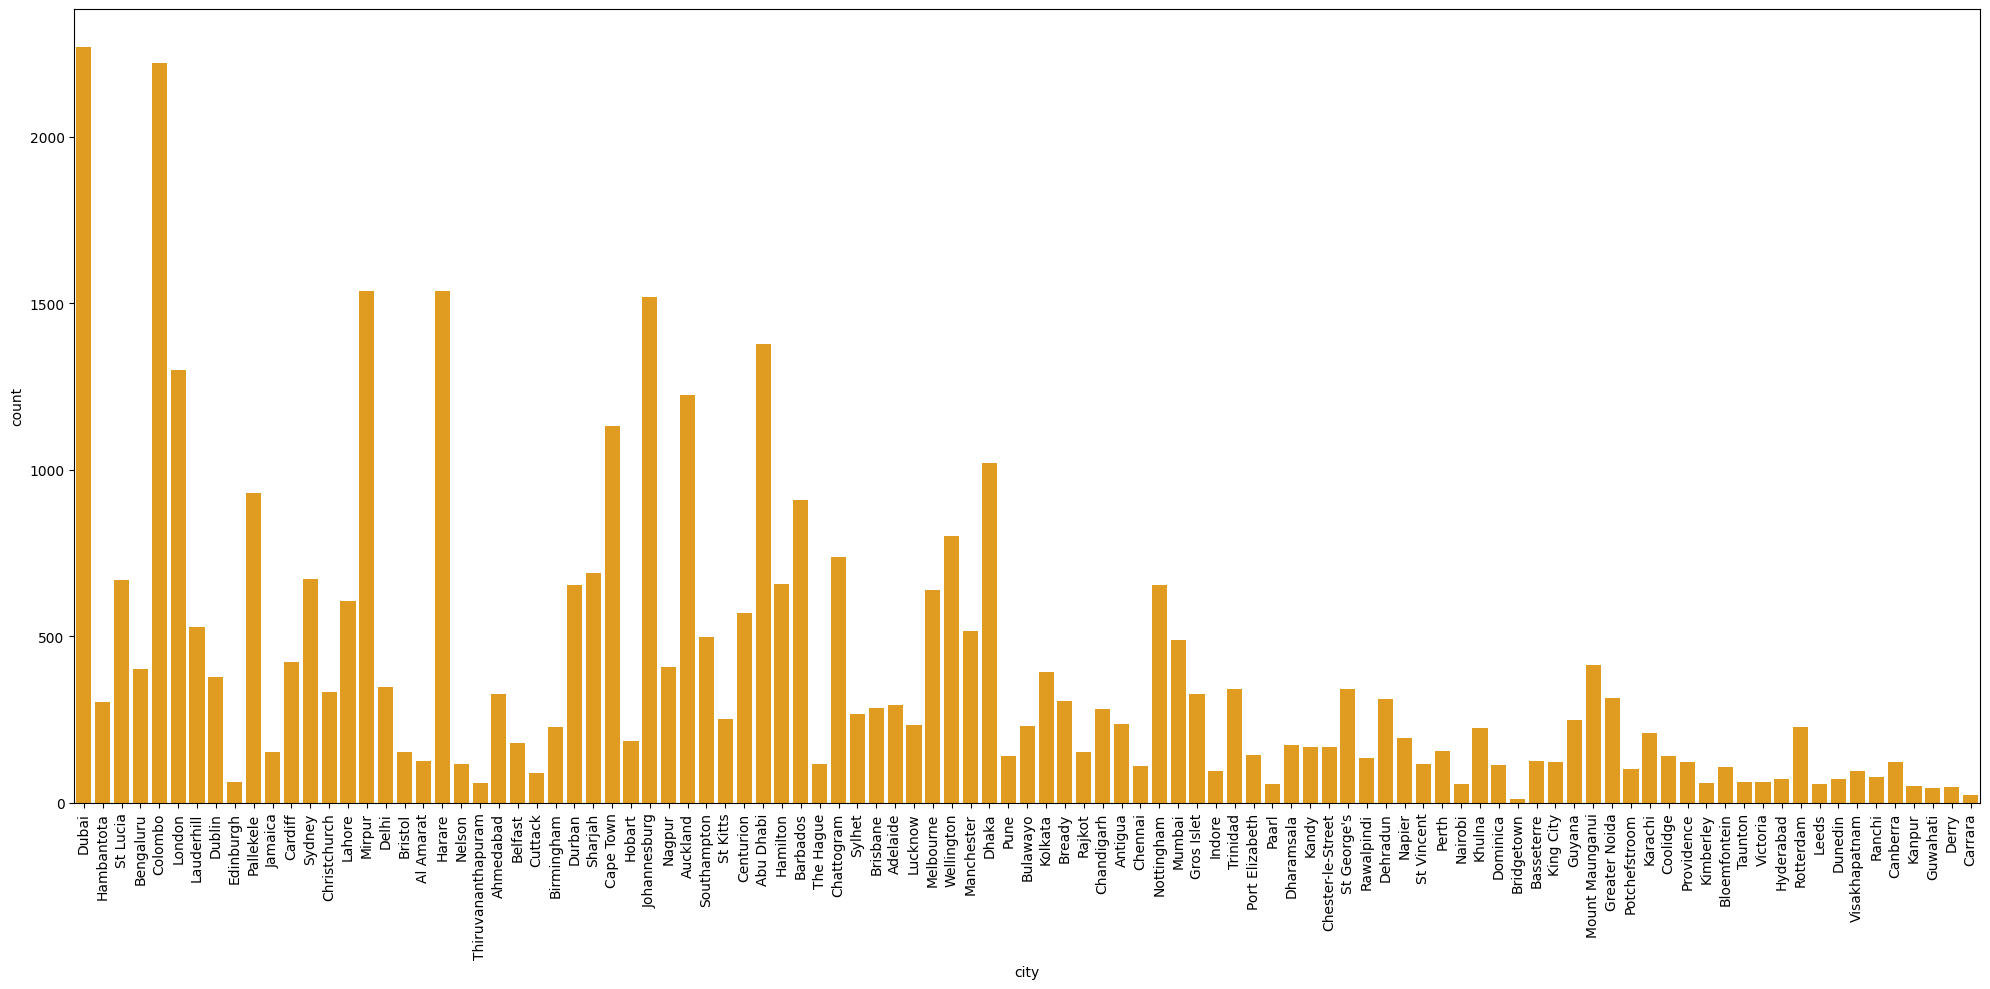

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['city'],data=df,color='orange')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# regplot()

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
num=[i for i in df.columns if i not in obj and i!='Final_Score']
num

['powerPlay',
 'AverageScore',
 'delivery_left',
 'score',
 'CurrentRunRate',
 'wicketsLeft',
 'Run_In_Last5',
 'Wickets_In_Last5',
 'innings']

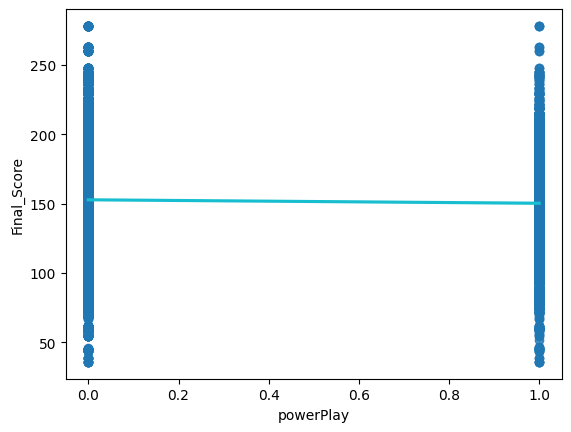

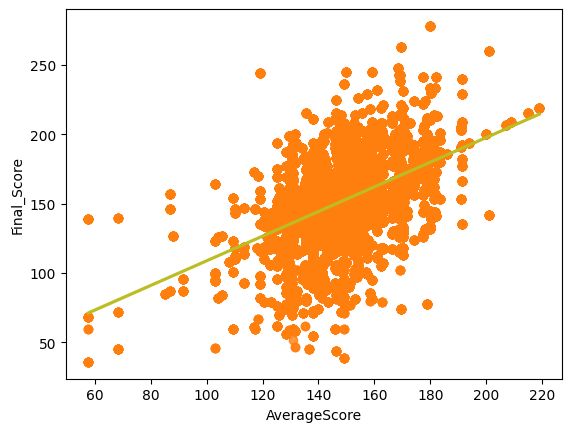

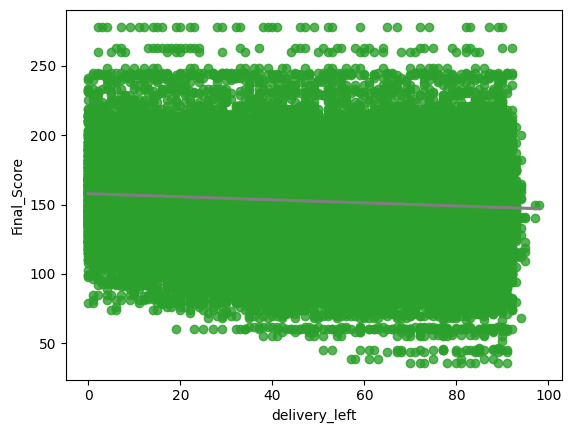

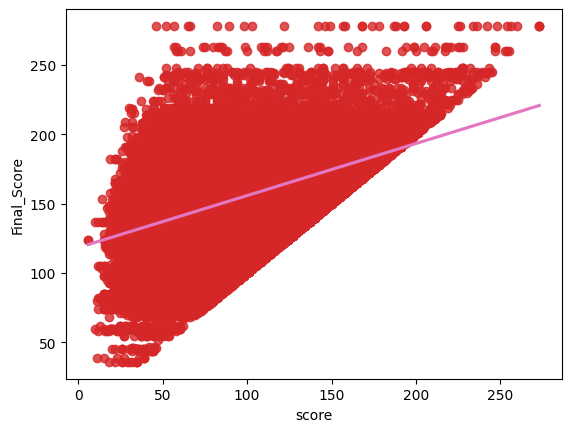

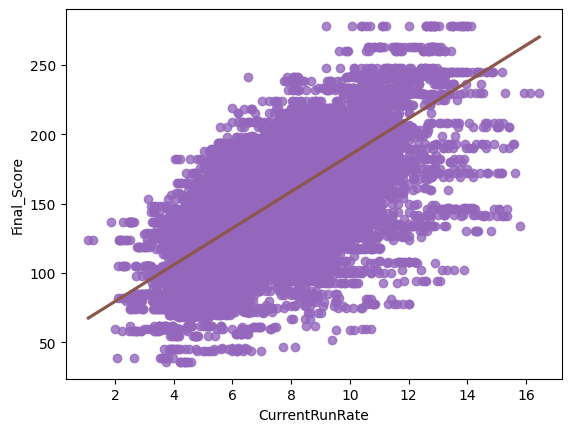

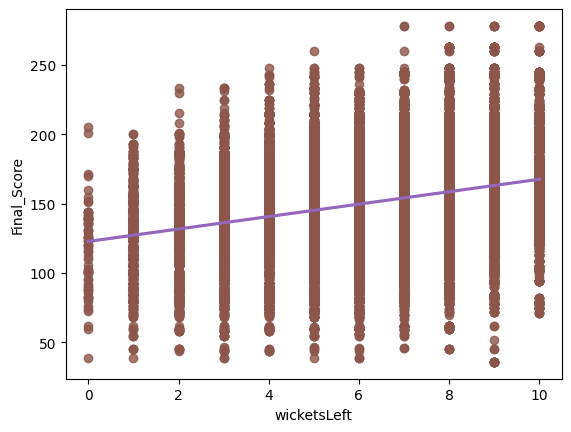

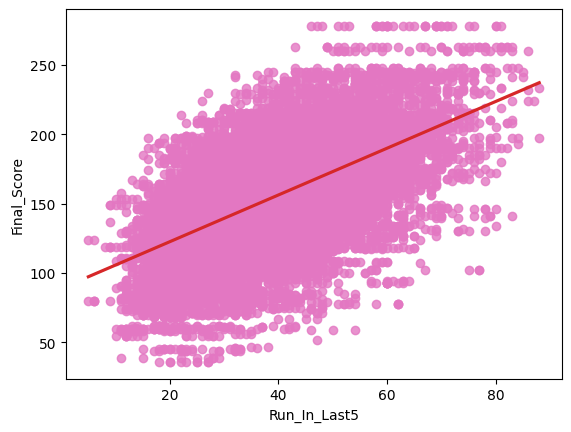

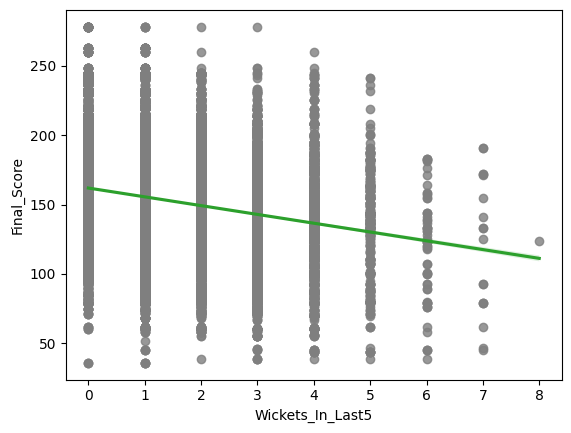

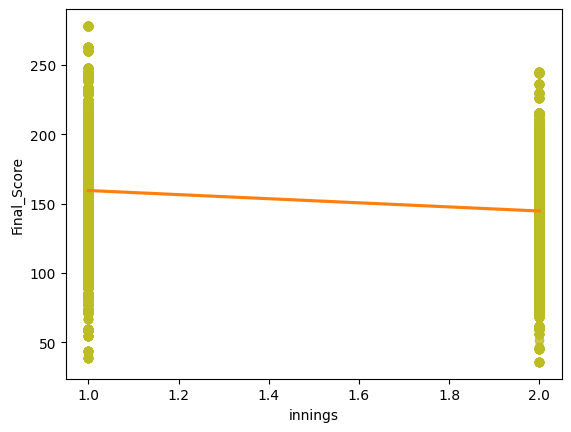

In [ ]:
scatter_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
line_colors = ['#17becf', '#bcbd22', '#7f7f7f', '#e377c2', '#8c564b',
               '#9467bd', '#d62728', '#2ca02c', '#ff7f0e']
j=0
for i in num:
    sns.regplot(x=df[i],y=df['Final_Score'],scatter_kws={'color':scatter_colors[j]},line_kws={'color':line_colors[j]})
    j+=1
    plt.show()

# count of object columns

In [ ]:
print(df['city'].unique())
print("-"*100)
df['city'].value_counts()

['Dubai' 'Hambantota' 'St Lucia' 'Bengaluru' 'Colombo' 'London'
 'Lauderhill' 'Dublin' 'Edinburgh' 'Pallekele' 'Jamaica' 'Cardiff'
 'Sydney' 'Christchurch' 'Lahore' 'Mirpur' 'Delhi' 'Bristol' 'Al Amarat'
 'Harare' 'Nelson' 'Thiruvananthapuram' 'Ahmedabad' 'Belfast' 'Cuttack'
 'Birmingham' 'Durban' 'Sharjah' 'Cape Town' 'Hobart' 'Johannesburg'
 'Nagpur' 'Auckland' 'Southampton' 'St Kitts' 'Centurion' 'Abu Dhabi'
 'Hamilton' 'Barbados' 'The Hague' 'Chattogram' 'Sylhet' 'Brisbane'
 'Adelaide' 'Lucknow' 'Melbourne' 'Wellington' 'Manchester' 'Dhaka' 'Pune'
 'Bulawayo' 'Kolkata' 'Bready' 'Rajkot' 'Chandigarh' 'Antigua' 'Chennai'
 'Nottingham' 'Mumbai' 'Gros Islet' 'Indore' 'Trinidad' 'Port Elizabeth'
 'Paarl' 'Dharamsala' 'Kandy' 'Chester-le-Street' "St George's"
 'Rawalpindi' 'Dehradun' 'Napier' 'St Vincent' 'Perth' 'Nairobi' 'Khulna'
 'Dominica' 'Bridgetown' 'Basseterre' 'King City' 'Guyana'
 'Mount Maunganui' 'Greater Noida' 'Potchefstroom' 'Karachi' 'Coolidge'
 'Providence' 'Kimberley' '

,count
city,
Dubai,2270
Colombo,2221
Mirpur,1537
Harare,1537
Johannesburg,1519
...,...
Kanpur,51
Derry,46
Guwahati,44


In [ ]:
print(df['battingTeam'].unique())
print("-"*100)
print(df['battingTeam'].value_counts())

['New Zealand' 'Zimbabwe' 'West Indies' 'Australia' 'Sri Lanka'
 'South Africa' 'England' 'India' 'Ireland' 'Afghanistan' 'Pakistan'
 'Netherlands' 'Bangladesh']
----------------------------------------------------------------------------------------------------
battingTeam
Pakistan        4523
New Zealand     3952
India           3946
Australia       3870
Sri Lanka       3777
England         3747
South Africa    3711
West Indies     3633
Bangladesh      2861
Zimbabwe        2179
Afghanistan     1575
Ireland         1490
Netherlands      736
Name: count, dtype: int64


In [ ]:
print(df['bowlingTeam'].unique())
print("-"*100)
print(df['bowlingTeam'].value_counts())

['Pakistan' 'Sri Lanka' 'Australia' 'India' 'South Africa' 'West Indies'
 'Netherlands' 'Bangladesh' 'New Zealand' 'England' 'Ireland' 'Zimbabwe'
 'Afghanistan']
----------------------------------------------------------------------------------------------------
bowlingTeam
Pakistan        4569
Australia       4001
India           3914
New Zealand     3906
South Africa    3850
West Indies     3806
England         3735
Sri Lanka       3609
Bangladesh      2681
Zimbabwe        2174
Afghanistan     1527
Ireland         1489
Netherlands      739
Name: count, dtype: int64


In [ ]:
df.isna().sum()

,0
powerPlay,440
AverageScore,0
battingTeam,0
bowlingTeam,0
city,0
delivery_left,0
score,0
CurrentRunRate,0
wicketsLeft,0
Run_In_Last5,4176


# Filling MIssing Values

In [ ]:
df['powerPlay'].unique()

array([ 0.,  1., nan])

In [ ]:
df['powerPlay']=df['powerPlay'].fillna(df['powerPlay'].mode()[0])

In [ ]:
print(df['Run_In_Last5'].unique())
print("-"*100)
df['Run_In_Last5'].value_counts()

[24. 30. 27. 50. 38. 39. 42. nan 58. 57. 51. 28. 32. 52. 36. 54. 46. 65.
 62. 44. 49. 41. 34. 69. 56. 29. 20. 35. 55. 45. 31. 25. 59. 14. 23. 61.
 63. 43. 33. 21. 40. 48. 47. 22. 70. 74. 37. 26. 19. 68. 17. 73. 18. 60.
 53. 66. 13. 12. 16. 81. 71. 77. 78. 64. 15. 79. 75. 72. 67. 86. 83.  9.
 88.  6. 11. 82. 85. 10. 76. 80. 84.  5. 87.  8.]
----------------------------------------------------------------------------------------------------


,count
Run_In_Last5,
35.0,1347
36.0,1345
34.0,1322
33.0,1297
32.0,1295
...,...
88.0,2
85.0,2
5.0,2


In [ ]:
df['Run_In_Last5']=df['Run_In_Last5'].fillna(df['Run_In_Last5'].median())

In [ ]:
print(df['Wickets_In_Last5'].unique())
print("-"*100)
df['Wickets_In_Last5'].value_counts()

[ 2.  3.  0.  1. nan  4.  6.  5.  7.  8.]
----------------------------------------------------------------------------------------------------


,count
Wickets_In_Last5,
1.0,11500
2.0,8523
0.0,6372
3.0,3938
4.0,1282
5.0,330
6.0,60
7.0,18
8.0,1


In [ ]:
df['Wickets_In_Last5']=df['Wickets_In_Last5'].fillna(df['Wickets_In_Last5'].mode()[0])

In [ ]:
df['innings'].unique()

array([ 1.,  2., nan])

In [ ]:
df['innings']=df['innings'].fillna(df['innings'].mode()[0])

In [ ]:
df.isna().sum()

,0
powerPlay,0
AverageScore,0
battingTeam,0
bowlingTeam,0
city,0
delivery_left,0
score,0
CurrentRunRate,0
wicketsLeft,0
Run_In_Last5,0


# Solving outliers

In [ ]:
for i in df.select_dtypes(include='number'):

  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  print(f"Lower Bound {i}: {lower_bound}, Upper Bound {i}: {upper_bound}")

  df_cleaned = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

Lower Bound powerPlay: 0.0, Upper Bound powerPlay: 0.0
Lower Bound AverageScore: 104.80357142857146, Upper Bound AverageScore: 193.5178571428571
Lower Bound delivery_left: -40.0, Upper Bound delivery_left: 136.0
Lower Bound score: -31.0, Upper Bound score: 209.0
Lower Bound CurrentRunRate: 2.8931637519872804, Upper Bound CurrentRunRate: 12.042925278219396
Lower Bound wicketsLeft: 0.5, Upper Bound wicketsLeft: 12.5
Lower Bound Run_In_Last5: 11.5, Upper Bound Run_In_Last5: 63.5
Lower Bound Wickets_In_Last5: -0.5, Upper Bound Wickets_In_Last5: 3.5
Lower Bound Final_Score: 70.5, Upper Bound Final_Score: 234.5
Lower Bound innings: -0.5, Upper Bound innings: 3.5


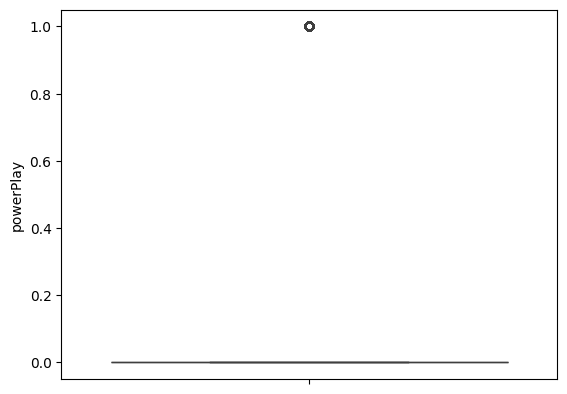

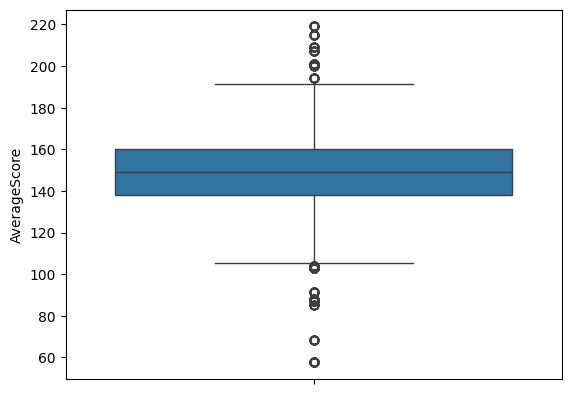

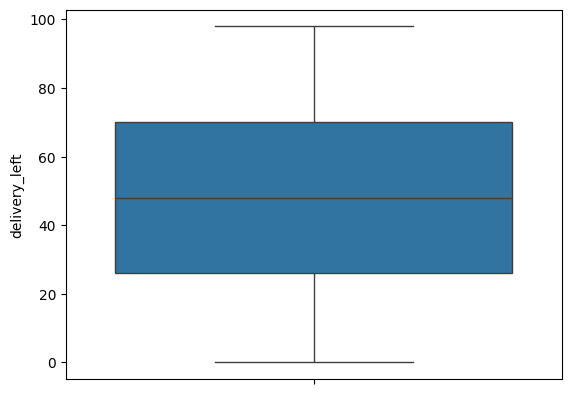

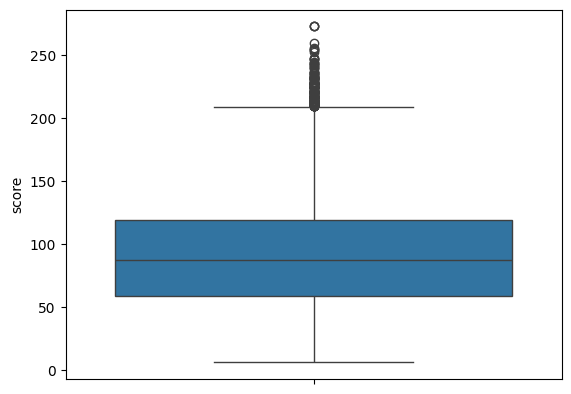

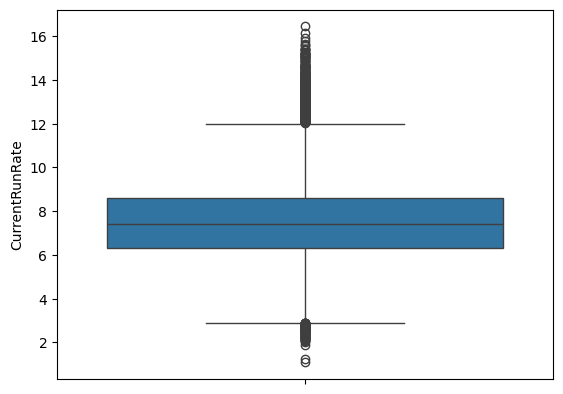

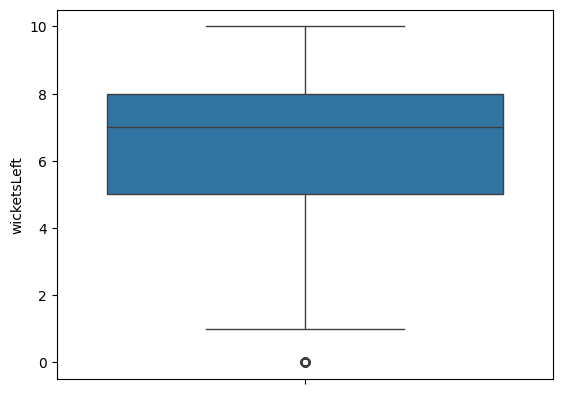

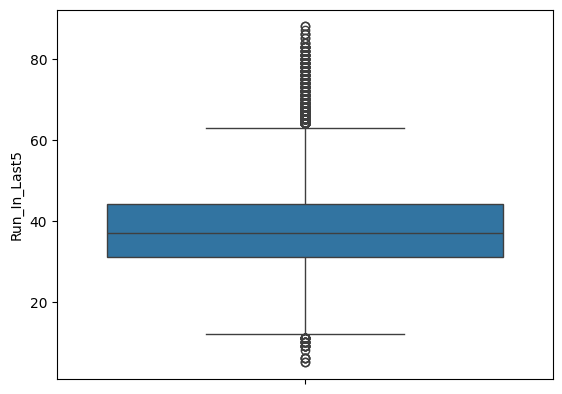

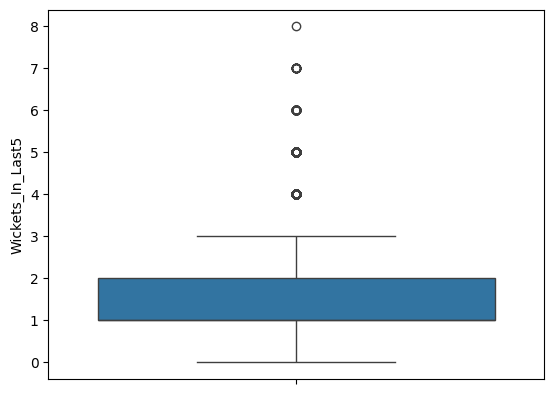

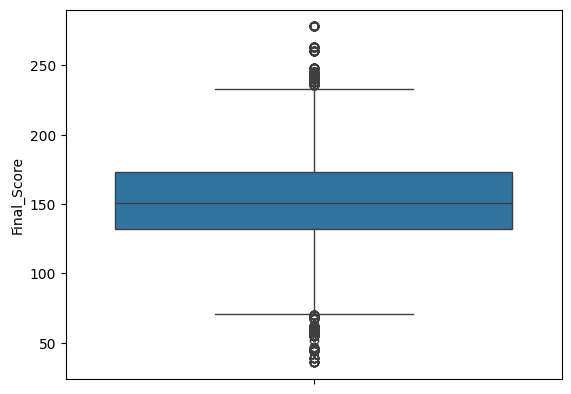

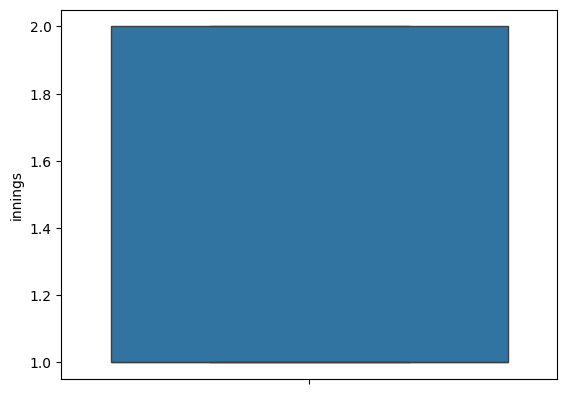

In [ ]:
for i in df.select_dtypes(include='number'):
  sns.boxplot(df_cleaned[i])
  plt.show()

# Encoding

Encoding using Label encoder as there is a lot of unique values

In [ ]:
encoder=LabelEncoder()
df_cleaned['city']=encoder.fit_transform(df_cleaned['city'])

In [ ]:
df_cleaned['city'].values

array([36, 45, 90, ..., 61, 23, 52])

Encoding using get dummies as there are few unique values

In [ ]:
df1=pd.get_dummies(df_cleaned[['battingTeam','bowlingTeam']],dtype=int,drop_first=True)

In [ ]:
df_final=pd.concat([df_cleaned,df1],axis=1)

In [ ]:
df_final

,powerPlay,AverageScore,battingTeam,bowlingTeam,city,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,...,bowlingTeam_England,bowlingTeam_India,bowlingTeam_Ireland,bowlingTeam_Netherlands,bowlingTeam_New Zealand,bowlingTeam_Pakistan,bowlingTeam_South Africa,bowlingTeam_Sri Lanka,bowlingTeam_West Indies,bowlingTeam_Zimbabwe
0,0.0,138.162791,New Zealand,Pakistan,36,63,56,5.894737,8,24.0,...,0,0,0,0,0,1,0,0,0,0
1,0.0,103.000000,Zimbabwe,Sri Lanka,45,40,76,5.700000,5,30.0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,154.000000,West Indies,Australia,90,53,68,6.089552,5,27.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,146.285714,Australia,India,9,18,159,9.352941,7,50.0,...,0,1,0,0,0,0,0,0,0,0
4,0.0,135.609756,Sri Lanka,South Africa,27,42,82,6.307692,7,38.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.0,146.153846,England,New Zealand,39,45,88,7.040000,7,27.0,...,0,0,0,0,1,0,0,0,0,0
39996,0.0,148.206897,Pakistan,Bangladesh,67,5,135,7.043478,6,40.0,...,0,0,0,0,0,0,0,0,0,0
39997,0.0,119.200000,New Zealand,West Indies,61,24,117,7.312500,3,33.0,...,0,0,0,0,0,0,0,0,1,0
39998,0.0,130.800000,Bangladesh,Sri Lanka,23,67,67,7.584906,8,37.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_final.columns

Index(['powerPlay', 'AverageScore', 'battingTeam', 'bowlingTeam', 'city',
       'delivery_left', 'score', 'CurrentRunRate', 'wicketsLeft',
       'Run_In_Last5', 'Wickets_In_Last5', 'Final_Score', 'innings',
       'battingTeam_Australia', 'battingTeam_Bangladesh',
       'battingTeam_England', 'battingTeam_India', 'battingTeam_Ireland',
       'battingTeam_Netherlands', 'battingTeam_New Zealand',
       'battingTeam_Pakistan', 'battingTeam_South Africa',
       'battingTeam_Sri Lanka', 'battingTeam_West Indies',
       'battingTeam_Zimbabwe', 'bowlingTeam_Australia',
       'bowlingTeam_Bangladesh', 'bowlingTeam_England', 'bowlingTeam_India',
       'bowlingTeam_Ireland', 'bowlingTeam_Netherlands',
       'bowlingTeam_New Zealand', 'bowlingTeam_Pakistan',
       'bowlingTeam_South Africa', 'bowlingTeam_Sri Lanka',
       'bowlingTeam_West Indies', 'bowlingTeam_Zimbabwe'],
      dtype='object')

In [ ]:
df_final.drop(['battingTeam','bowlingTeam'],axis=1,inplace=True)

In [ ]:
df_final.dtypes

,0
powerPlay,float64
AverageScore,float64
city,int64
delivery_left,int64
score,int64
CurrentRunRate,float64
wicketsLeft,int64
Run_In_Last5,float64
Wickets_In_Last5,float64
Final_Score,int64


In [ ]:
df_final.shape

(40000, 35)

# Splitting training and testing data

In [ ]:
x=df_final.drop('Final_Score',axis=1)
y=df['Final_Score']

In [ ]:
x

,powerPlay,AverageScore,city,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,innings,...,bowlingTeam_England,bowlingTeam_India,bowlingTeam_Ireland,bowlingTeam_Netherlands,bowlingTeam_New Zealand,bowlingTeam_Pakistan,bowlingTeam_South Africa,bowlingTeam_Sri Lanka,bowlingTeam_West Indies,bowlingTeam_Zimbabwe
0,0.0,138.162791,36,63,56,5.894737,8,24.0,2.0,1.0,...,0,0,0,0,0,1,0,0,0,0
1,0.0,103.000000,45,40,76,5.700000,5,30.0,2.0,2.0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,154.000000,90,53,68,6.089552,5,27.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,146.285714,9,18,159,9.352941,7,50.0,0.0,2.0,...,0,1,0,0,0,0,0,0,0,0
4,0.0,135.609756,27,42,82,6.307692,7,38.0,1.0,2.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.0,146.153846,39,45,88,7.040000,7,27.0,3.0,2.0,...,0,0,0,0,1,0,0,0,0,0
39996,0.0,148.206897,67,5,135,7.043478,6,40.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
39997,0.0,119.200000,61,24,117,7.312500,3,33.0,3.0,2.0,...,0,0,0,0,0,0,0,0,1,0
39998,0.0,130.800000,23,67,67,7.584906,8,37.0,1.0,2.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y

,Final_Score
0,144
1,100
2,105
3,194
4,135
...,...
39995,159
39996,141
39997,153
39998,166


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)

# Model Creation

In [ ]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

In [ ]:
models=[lr,dt,rf]

In [ ]:
for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(f"Model is :{model}")
  print(y_pred)
  print("-"*100)

Model is :LinearRegression()
[140.62536757 141.86556709 134.10065836 ... 139.58244207 171.4578768
 115.71115334]
----------------------------------------------------------------------------------------------------
Model is :DecisionTreeRegressor()
[157. 159. 161. ... 147. 142. 127.]
----------------------------------------------------------------------------------------------------
Model is :RandomForestRegressor()
[152.46 148.77 133.12 ... 144.42 151.27 125.78]
----------------------------------------------------------------------------------------------------


# Evaluation

In [ ]:
for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(f"Model is {model}")
  print("*"*15)
  print(f"MAE is {mean_absolute_error(y_test,y_pred)}")
  print(f"MApE is {mean_absolute_percentage_error(y_test,y_pred)}")
  print(f"MSE is {mean_squared_error(y_test,y_pred)}")
  print(f"RMSE is {root_mean_squared_error(y_test,y_pred)}")
  print(f"r2 score is {r2_score(y_test,y_pred)}")
  print("-"*50)

Model is LinearRegression()
***************
MAE is 14.630239670933836
MApE is 0.10676291963978347
MSE is 379.26558501267806
RMSE is 19.474742232252474
r2 score is 0.6547582073024021
--------------------------------------------------
Model is DecisionTreeRegressor()
***************
MAE is 5.325166666666667
MApE is 0.0382514853835955
MSE is 185.16516666666666
RMSE is 13.60754080158008
r2 score is 0.8314459402294238
--------------------------------------------------
Model is RandomForestRegressor()
***************
MAE is 5.939443833333334
MApE is 0.0431627088853661
MSE is 98.88714612508332
RMSE is 9.944201633368227
r2 score is 0.9099839876011111
--------------------------------------------------


# Hyper paramter tuning

In [ ]:
dt1=DecisionTreeRegressor()
from sklearn.model_selection import GridSearchCV
param= {
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
clf = GridSearchCV(estimator=dt1, param_grid=param, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
clf.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
print("Best Parameters:", clf.best_params_)

Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [ ]:
dt2=DecisionTreeRegressor(max_depth=None,max_features= None,min_samples_leaf= 1,min_samples_split= 5)
dt2.fit(x_train,y_train)
y_pred1=dt2.predict(x_test)
print(f"r2 score for DecisionTree model is {r2_score(y_test,y_pred1)}")

r2 score for DecisionTree model is 0.8290022147530982


#Github

In [ ]:
!git clone https://github.com/pranavkp25/Cricket-Score-prediction-model


Cloning into 'Cricket-Score-prediction-model'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!cp "/content/drive/My Drive/Colab Notebooks/my_notebook.ipynb" /content/my-repository/


cp: cannot stat '/content/drive/My Drive/Colab Notebooks/my_notebook.ipynb': No such file or directory
